In [1]:
# 📦 Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
df = pd.concat([X, y], axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


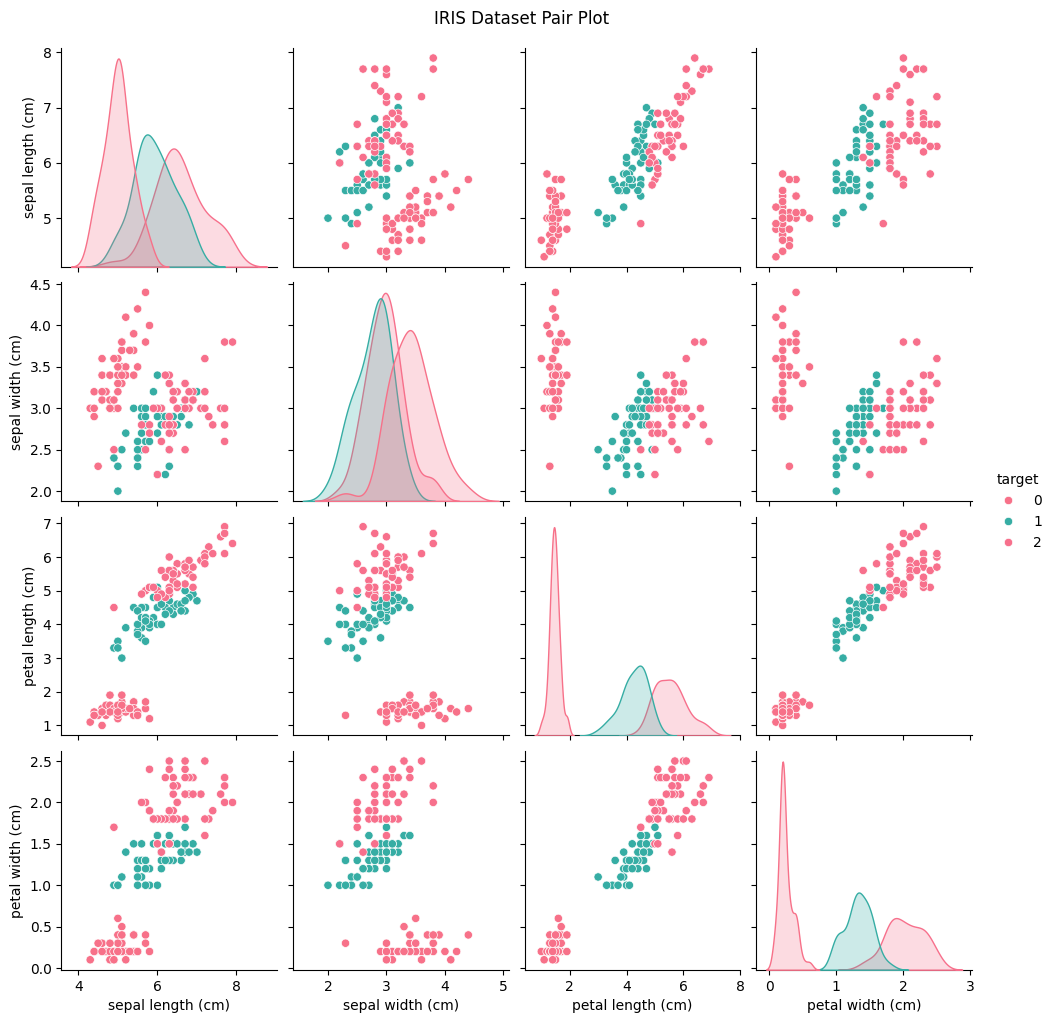

In [4]:
sns.pairplot(df, hue="target", palette="husl", diag_kind="kde")
plt.suptitle("IRIS Dataset Pair Plot", y=1.02)
plt.show()


# **🎯 Bias–Variance Trade-off**

In [6]:
simple_model = DecisionTreeClassifier(max_depth=2)
complex_model = DecisionTreeClassifier(max_depth=10)

cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores_simple = cross_val_score(simple_model, X, y, cv=cv)
scores_complex = cross_val_score(complex_model, X, y, cv=cv)

print("Simple Model Accuracy:", scores_simple.mean())
print("Complex Model Accuracy:", scores_complex.mean())


Simple Model Accuracy: 0.9133333333333333
Complex Model Accuracy: 0.9333333333333332


# **🧪 Hypothesis Testing & Variable Selection**

In [ ]:
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
print("Selected Features:", X.columns[selector.get_support()])


# **🔁 Subsampling and Upsampling**

In [12]:
df_imbalanced = df[df['target'] != 2]
df_0 = df_imbalanced[df_imbalanced['target'] == 0]
df_1 = df_imbalanced[df_imbalanced['target'] == 1].sample(frac=0.3, random_state=1)
df_imbal = pd.concat([df_0, df_1])

df_minority_upsampled = resample(df_1, replace=True, n_samples=len(df_0), random_state=1)
df_upsampled = pd.concat([df_0, df_minority_upsampled])

print("Before Upsampling:\n", df_imbal['target'].value_counts())
print("After Upsampling:\n", df_upsampled['target'].value_counts())


Before Upsampling:
 target
0    50
1    15
Name: count, dtype: int64
After Upsampling:
 target
0    50
1    50
Name: count, dtype: int64


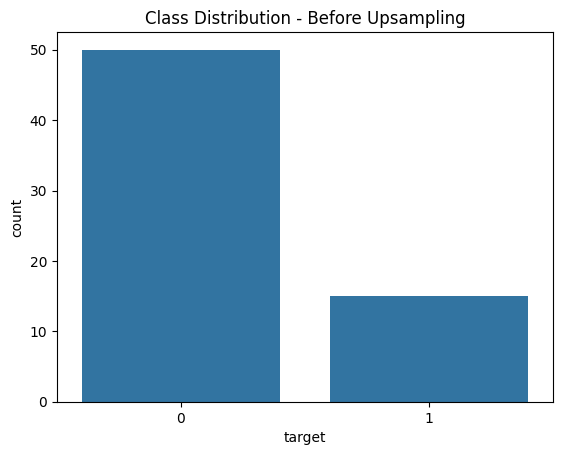

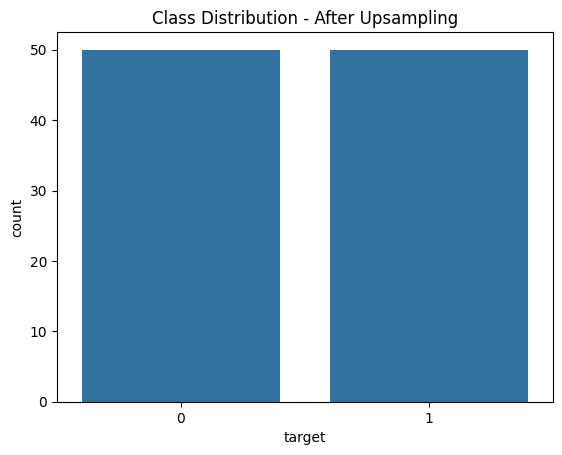

In [11]:
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create imbalanced dataset
df_imbal = df[df['target'] != 2]  # Remove class 2
df_class_0 = df_imbal[df_imbal['target'] == 0]
df_class_1 = df_imbal[df_imbal['target'] == 1].sample(frac=0.3, random_state=42)

# Combine to form imbalanced dataset
df_imbal = pd.concat([df_class_0, df_class_1])

# Step 2: Plot BEFORE upsampling
sns.countplot(x="target", data=df_imbal)
plt.title("Class Distribution - Before Upsampling")
plt.show()

# Step 3: Upsample minority class (class 1)
df_minority_upsampled = resample(df_class_1,
                                 replace=True,
                                 n_samples=len(df_class_0),
                                 random_state=42)

# Combine to form upsampled dataset
df_upsampled = pd.concat([df_class_0, df_minority_upsampled])

# Step 4: Plot AFTER upsampling
sns.countplot(x="target", data=df_upsampled)
plt.title("Class Distribution - After Upsampling")
plt.show()



# **🌱 SMOTE (Synthetic Minority Oversampling Technique)**

In [14]:
X_sm = df_imbal.drop('target', axis=1)
y_sm = df_imbal['target']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_sm, y_sm)

print("After SMOTE:\n", pd.Series(y_res).value_counts())


After SMOTE:
 target
0    50
1    50
Name: count, dtype: int64


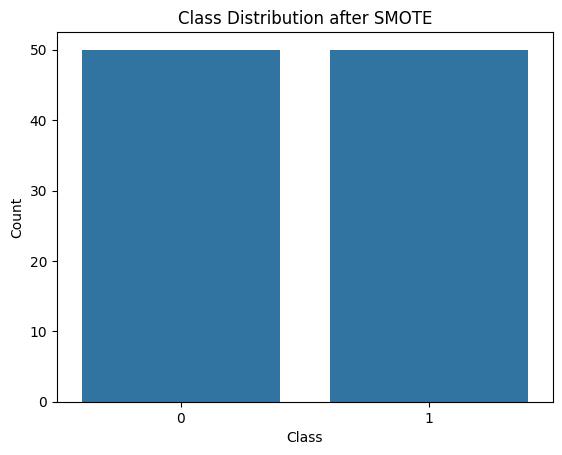

In [15]:
from imblearn.over_sampling import SMOTE

# Separate features and labels from imbalanced data
X_imbal = df_imbal.drop('target', axis=1)
y_imbal = df_imbal['target']

# Apply SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_imbal, y_imbal)

# Plot the new class distribution
sns.countplot(x=y_smote)
plt.title("Class Distribution after SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# **🔁 Cross-Validation Strategies**

In [16]:
#  Validation Set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Validation Accuracy:", accuracy_score(y_valid, model.predict(X_valid)))


Validation Accuracy: 1.0


In [17]:
#  Leave-One-Out (LOO)
loo = LeaveOneOut()
model = LogisticRegression(max_iter=200)
scores = cross_val_score(model, X, y, cv=loo)
print("LOO CV Accuracy:", scores.mean())


LOO CV Accuracy: 0.9666666666666667


In [18]:
#  K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf)
print("K-Fold CV Accuracy:", scores.mean())


K-Fold CV Accuracy: 0.9733333333333334


In [19]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf)
print("Stratified K-Fold CV Accuracy:", scores.mean())


Stratified K-Fold CV Accuracy: 0.9666666666666668


In [20]:
# Bootstrap Resampling
boot_scores = []
for _ in range(100):
    X_, y_ = resample(X, y)
    model.fit(X_, y_)
    boot_scores.append(model.score(X, y))

print("Bootstrap Accuracy Mean:", np.mean(boot_scores))


Bootstrap Accuracy Mean: 0.9707333333333336
